### **Supplementary Figures**

#### **Setup**

In [2]:
# Autoreload
%load_ext autoreload
%autoreload 2

# Import helper functions
import sys
sys.path.append('code')
from stats_helpers import *
from MIND_helpers import *
from preprocessing_helpers import *
from plotting_helpers import *

#### **Supplementary Figure 7: Comparing T1w/T2w and MBP expression distribution shapes**

Supplementary analyses for Main Figure 2

Here, we explore the shapes of distributions in adult MBP expression images and compare them to T1w/T2w images. Specifically, the standard deviation (wideness) and skew (asymmetry) are extracted and examined.

Begin by visualising ROIs in the adult MBP expression image with high and low standard deviation and skewness, to illustrate the space of shapes that regional dsitributions can take.

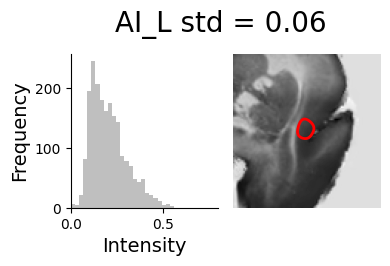

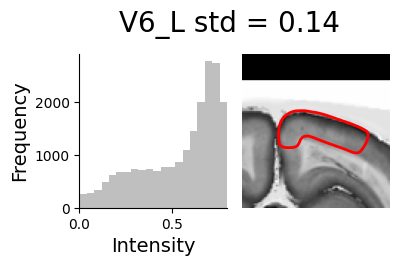

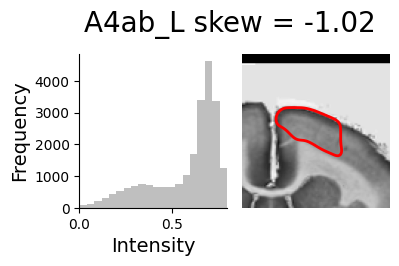

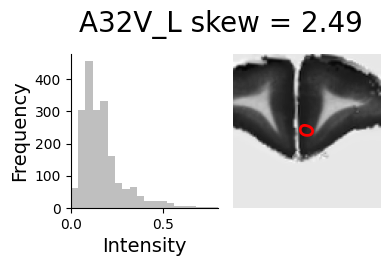

In [2]:
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# ----- Load data ----- #
lut = pd.read_csv('data/lut_master.csv', index_col=0)
parc_path = 'data/sp2_label_512_v1.0.0.nii.gz'   # parcellation
img_path = 'data/MBP_4Y_img.nii'                 # ISH / MBP image
vox = pd.read_csv('output/MBP/MBP_4Y_vox.csv', index_col=0)  # voxel values

A = 50                       # slice window size
pct_min, pct_max = 90, 100   # intensity clipping range for visualization


# ----- Standard deviation visualization ----- #

rois = ['AI_L', 'V6_L']  # ROIs of interest

for roi in rois:
    # ROI mask from parcellation
    parc_data = np.pad(nib.load(parc_path).get_fdata(), pad_width=40)
    roi_mask = parc_data == lut['bm_code'][np.where(lut['Label'] == roi)[0][0]]
    parc_voxels = np.where(roi_mask)
    x_avg = round(np.mean(parc_voxels[0]))
    y_avg = round(np.mean(parc_voxels[1]))
    z_avg = round(np.mean(parc_voxels[2]))

    # Setup figure with two subplots (image + histogram)
    fig = plt.figure(figsize=(4, 2))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=[1], wspace=0.1, hspace=0.3)

    # ----- ROI slice from image ----- #
    ax_img = fig.add_subplot(gs[0, 1])
    img_data = np.pad(nib.load(img_path).get_fdata(), pad_width=40)
    slice_img = img_data[x_avg-A:x_avg+A, y_avg, z_avg-A:z_avg+A]
    rotated = np.rot90(slice_img, k=3)

    mask_slice = roi_mask[x_avg-A:x_avg+A, y_avg, z_avg-A:z_avg+A]
    mask_rotated = np.rot90(mask_slice, k=3)
    mask_smooth = gaussian_filter(mask_rotated.astype(float), sigma=2.5)

    ax_img.imshow(rotated, cmap='gray', origin='lower')
    ax_img.contour(mask_smooth, colors='red', levels=[0.5], linewidths=2)
    ax_img.axis('off')
    ax_img.set_aspect('auto')

    # ----- Histogram of ROI voxel intensities ----- #
    ax_hist = fig.add_subplot(gs[0, 0])
    vals = vox.Value
    vmin, vmax = np.percentile(vals, [1, 99])  # clip outliers
    vals = np.clip((vals - vmin) / (vmax - vmin), 0, 1)
    vox["Value_norm"] = (vals - np.min(vals)) / (np.max(vals) - np.min(vals))

    roi_vals = vox[vox['Label'] == roi].Value_norm
    ax_hist.hist(roi_vals, bins=25, alpha=0.5, color='grey')

    ax_hist.spines['top'].set_visible(False)
    ax_hist.spines['right'].set_visible(False)
    ax_hist.set_xlim(0, 0.8)
    ax_hist.set_xlabel('Intensity', fontsize=14)
    ax_hist.set_ylabel('Frequency', fontsize=14)

    # Title = ROI with std
    plt.suptitle(f'{roi} std = {vox[vox["Label"] == roi].Value.std():.2f}', fontsize=20, y=1.1)
    plt.show()

# ----- Skewness visualization ----- #

rois = ['A4ab_L', 'A32V_L']

for roi in rois:
    # ROI mask from parcellation
    parc_data = np.pad(nib.load(parc_path).get_fdata(), pad_width=40)
    roi_mask = parc_data == lut['bm_code'][np.where(lut['Label'] == roi)[0][0]]
    parc_voxels = np.where(roi_mask)
    x_avg = round(np.mean(parc_voxels[0]))
    y_avg = round(np.mean(parc_voxels[1]))
    z_avg = round(np.mean(parc_voxels[2]))

    fig = plt.figure(figsize=(4, 2))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=[1], wspace=0.1, hspace=0.3)

    # ----- ROI slice from image ----- #
    ax_img = fig.add_subplot(gs[0, 1])
    img_data = np.pad(nib.load(img_path).get_fdata(), pad_width=40)
    slice_img = img_data[x_avg-A:x_avg+A, y_avg, z_avg-A:z_avg+A]
    rotated = np.rot90(slice_img, k=3)

    mask_slice = roi_mask[x_avg-A:x_avg+A, y_avg, z_avg-A:z_avg+A]
    mask_rotated = np.rot90(mask_slice, k=3)
    mask_smooth = gaussian_filter(mask_rotated.astype(float), sigma=2.5)

    ax_img.imshow(rotated, cmap='gray', origin='lower')
    ax_img.contour(mask_smooth, colors='red', levels=[0.5], linewidths=2)
    ax_img.axis('off')
    ax_img.set_aspect('auto')

    # ----- Histogram of ROI voxel intensities ----- #
    ax_hist = fig.add_subplot(gs[0, 0])
    vals = vox.Value
    vmin, vmax = np.percentile(vals, [1, 99])
    vals = np.clip((vals - vmin) / (vmax - vmin), 0, 1)
    vox["Value_norm"] = (vals - np.min(vals)) / (np.max(vals) - np.min(vals))

    roi_vals = vox[vox['Label'] == roi].Value_norm
    ax_hist.hist(roi_vals, bins=25, alpha=0.5, color='grey')

    ax_hist.spines['top'].set_visible(False)
    ax_hist.spines['right'].set_visible(False)
    ax_hist.set_xlim(0, 0.8)
    ax_hist.set_xlabel('Intensity', fontsize=14)
    ax_hist.set_ylabel('Frequency', fontsize=14)

    # Title = ROI with skew
    plt.suptitle(f'{roi} skew = {vox[vox["Label"] == roi].Value.skew():.2f}', fontsize=20, y=1.1)
    plt.show()


Assess the region-wise correspondence in distribution shapes between adult MBP expression and T1w/T2w

First, extract standard deviation and skewness per region per subject 

In [ ]:
# Load region lookup table
lut = pd.read_csv('data/lut_master.csv', index_col=0)

# Load subject lookup table
subj_df = pd.read_csv('data/subj_df_all.csv', index_col=0)

# Load voxel directory
#vox_dir = 'output/t12_vox/'
vox_dir = '/Volumes/EdH_drive_1/PhD/t12/vox/full'

# Initialise dfs to hold std and skew of each ROI in each subject
std_t12_per_subj = np.zeros((subj_df.shape[0], lut.shape[0]))
skew_t12_per_subj = np.zeros((subj_df.shape[0], lut.shape[0]))

# Loop subjects, calculate std and skew of each ROI, save
for i, row in tqdm(subj_df.iterrows()):
    vox_path = os.path.join(vox_dir, f'T1wT2w_{row["id"].astype(int).astype(str).zfill(3)}_vox.csv')
    vox_df = pd.read_csv(vox_path, index_col=0)
    
    std_t12_per_subj[i,:] = vox_df.groupby('Label', sort=False)['Value'].std().values
    skew_t12_per_subj[i,:] = vox_df.groupby('Label', sort=False)['Value'].skew().values

# Save dataframes
std_t12_per_subj_df = pd.concat([
    subj_df,
    pd.DataFrame(std_t12_per_subj, columns=lut['Label'])
], axis=1)
std_t12_per_subj_df.to_csv('output/subj_dfs/std_t12_per_subj.csv', index=False)

skew_t12_per_subj_df = pd.concat([
    subj_df,
    pd.DataFrame(skew_t12_per_subj, columns=lut['Label'])
], axis=1)
skew_t12_per_subj_df.to_csv('output/subj_dfs/skew_t12_per_subj.csv', index=False)

Now correlate adult T1w/T2w and MBP expression standard deviation and skewness across the cortex

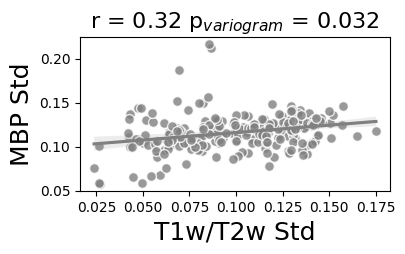

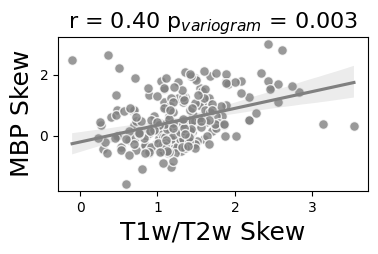

In [ ]:
# ----- Load data ----- #

# Load mean t12 per subject to filter
mean_t12_per_subj_df_filt = pd.read_csv('output/subj_dfs/mean_t12_per_subj_filt.csv', index_col=0)

# Load standard deviation per subject, filter, save
std_t12_per_subj_df = pd.read_csv('output/subj_dfs/std_t12_per_subj.csv')
std_t12_per_subj_df_filt = std_t12_per_subj_df.set_index("id").loc[mean_t12_per_subj_df_filt["id"]].reset_index()
std_t12_per_subj_df_filt.to_csv('output/subj_dfs/std_t12_per_subj_filt.csv')

# Load skewness per subject, filter, save
skew_t12_per_subj_df = pd.read_csv('output/subj_dfs/skew_t12_per_subj.csv')
skew_t12_per_subj_df_filt = skew_t12_per_subj_df.set_index("id").loc[mean_t12_per_subj_df_filt["id"]].reset_index()
skew_t12_per_subj_df_filt.to_csv('output/subj_dfs/skew_t12_per_subj_filt.csv')

# Get mean over all adults
std_t12_adult = std_t12_per_subj_df_filt.loc[std_t12_per_subj_df_filt['Age'] > 1.75, std_t12_per_subj_df_filt.columns[3:]].mean(axis=0)
skew_t12_adult = skew_t12_per_subj_df_filt.loc[skew_t12_per_subj_df_filt['Age'] > 1.75, skew_t12_per_subj_df_filt.columns[3:]].mean(axis=0)

# Get mean and std in 4Y MBP expression image
MBP_4Y_vox = pd.read_csv('output/MBP/MBP_4Y_vox.csv', index_col=0)
std_MBP_adult = MBP_4Y_vox.groupby('Label', sort=False)["Value"].std()
skew_MBP_adult = MBP_4Y_vox.groupby('Label', sort=False)["Value"].skew()

# ----- Correlate ----- #
lut = pd.read_csv('data/lut_master.csv', index_col=0)
dist = pd.read_csv('data/distance_matrix.csv', index_col=0)


# Standard deviation
# Get r and p
r, p = get_brainsmashed_region_correlation_p_val(map_a = std_t12_adult.values,
                                                 map_b = std_MBP_adult.values,
                                                 regions_ind = None,
                                                 dist = dist.values,
                                                 surrogates_filename = 'output/surrogates/adult_t12_std_surrogates_lh.csv', 
                                                 lh=False,
                                                 n_perm=1000, 
                                                 test_type = 'two-tailed')

# Plot
df = pd.DataFrame({
        'T12': pd.to_numeric(std_t12_adult.values, errors='coerce'),
        'MBP': pd.to_numeric(std_MBP_adult.values, errors='coerce')
    })

plt.figure(figsize=(4, 2))
sns.regplot(x='T12', y='MBP', data=df, color='grey', marker='o', line_kws={'color': 'grey'}, scatter_kws={'s': 50, 'edgecolors': 'white'})
plt.xlabel(f'T1w/T2w Std', fontsize=18)
plt.ylabel('MBP Std', fontsize=18)
if p < 0.001:
    p_text = '< 0.001'
else:
    p_text = f'= {p:.3f}'
plt.title(f'r = {r:.2f} p$_{{variogram}}$ {p_text}', fontsize=16)
plt.show()


# Skewness
# Get r and p
r, p = get_brainsmashed_region_correlation_p_val(map_a = skew_t12_adult.values,
                                                 map_b = skew_MBP_adult.values,
                                                 regions_ind = None,
                                                 dist = dist.values,
                                                 surrogates_filename = 'output/surrogates/adult_t12_skew_surrogates_lh.csv', 
                                                 lh=False,
                                                 n_perm=1000, 
                                                 test_type = 'two-tailed')

# Plot
df = pd.DataFrame({
        'T12': pd.to_numeric(skew_t12_adult.values, errors='coerce'),
        'MBP': pd.to_numeric(skew_MBP_adult.values, errors='coerce')
    })

plt.figure(figsize=(4, 2))
sns.regplot(x='T12', y='MBP', data=df, color='grey', marker='o', line_kws={'color': 'grey'}, scatter_kws={'s': 50, 'edgecolors': 'white'})
plt.xlabel(f'T1w/T2w Skew', fontsize=18)
plt.ylabel('MBP Skew', fontsize=18)
if p < 0.001:
    p_text = '< 0.001'
else:
    p_text = f'= {p:.3f}'
plt.title(f'r = {r:.2f} p$_{{variogram}}$ {p_text}', fontsize=16)
plt.show()

#### **Supplementary Figure 8: Assignment of interneuron clusters to subtypes**

Supplementary analyses for Main Figure 3

Assign interneuron clusters to biological subtypes using pre-defined interneuron marker gene sets from marmoset primary motor cortex (Bakken et al. 2021)

Start by extracting mean expression of each marker by each cell cluster. 

NOTE: expression of marker genes in each interneuron cluster is provided in output/gene_exp/GAD_marker_expression_in_clusters.csv. If using this, the following cell does not need to be run.

In [ ]:
# Import packages
import scanpy as sc


# ----- Load data ----- #

gad_filename = 'cortex_GAD.h5ad'
data_dir = "/home/eh636/rds/hpc-work/marm_MIND/rnaseq/data/"
file_path = os.path.join(data_dir, gad_filename)

cell = 'GAD'
adata = sc.read_h5ad(file_path)

# Candidate GAD marker genes
gad_markers = [
    'GLIS3', 'TOX3', 'COL25A1', 'KIT', 'ALK', 'RELN', 'TOX2', 'TACR1',
    'TRPC6', 'NTNG1', 'SORCS3', 'PBX3', 'KCNK13', 'SYT10', 'TMEM132C',
    'CHST9', 'LRRC38', 'SULF1', 'FAM19A1', 'POSTN', 'EYS', 'MYO5B',
    'ABCB4', 'RNF144B', 'SLIT2', 'CALN1', 'FAM179A', 'FILIP1', 'PRKG1',
    'B3GLCT', 'BTBD11', 'CCDC141', 'CHRM2', 'CPNE8',
    'THSD7B', 'PATJ', 'FBN2', 'GPRIN3', 'SPACA1',
    'ARHGAP6', 'CDH4', 'ARHGAP18', 'PCDH15', 'VEGFC', 'CNR1', 'TRPM3',
    'SKAP1', 'NPY', 'NOS1', 'ABI3BP',
    'NELL1', 'TRHDE', 'CBLN4', 'COL24A1', 'PTPRT', 'SERPINI1', 'GLRA3',
    'NXPH1', 'PCDH11X', 'COL12A1', 'ARHGAP24', 'SYT9',
    'TAC1', 'COL19A1', 'KCTD8', 'NCKAP5', 'UNC13C', 'ANKRD55',
    'MAN1A1', 'ALCAM',
    'ADARB2', 'SEMA3C', 'EGFR', 'FREM1', 'CALB2', 'PCSK6', 'CREB5',
    'CRH', 'MYO16', 'THSD4',
    'ANO1', 'THSD7A',
    'TRPC4', 'VIP'
]


# ----- Preprocessing ----- #

# log-transform expression values
sc.pp.log1p(adata)  

# Get clusters
clusters = adata.obs.CLUSTER.unique()
clusters = np.sort(clusters.astype(int)).astype(str)

# Subset to marker genes
marker_gene_idx = pd.Index(adata.var["human_gene_name"]).get_indexer(gad_markers)
adata_markers = adata[:, marker_gene_idx]

# Initialise variables to hold marker gene expression per cluster
expression_mat = np.zeros((len(gad_markers), len(clusters)))
cluster_labs = []

# Loop clusters, extract marker gene expression
for i, cluster in tqdm(enumerate(clusters)):
    cluster_idx = np.where((adata.obs["CLUSTER"] == cluster))[0]
    adata_cluster_marker = adata_markers[cluster_idx, :]
    expression_mat[:, i] = adata_cluster_marker.X.mean(axis=0).A1
    cluster_labs.append(f'{cell}_{cluster}')

expression_df = pd.DataFrame(expression_mat, index=gad_markers, columns=cluster_labs)

# Save
expression_df.to_csv('output/gene_exp/GAD_marker_expression_in_clusters.csv')

Load marker gene expression dataframe (this is provided). To reduce the effect of highly expressed genes, give each gene's expression zero mean and unit variance, i.e. z-score across cells. Then compute and display the mean z-scored expression of each marker gene set in each cluster. Mean z-scored expression is used to assign each cluster to its most likely biological identity.

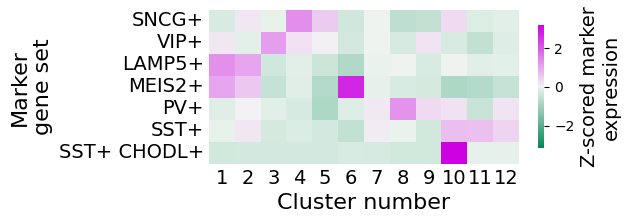

In [3]:
# Import packages
from scipy.stats import zscore
from matplotlib.colors import TwoSlopeNorm

# ----- Load data ----- #
gad_marker_expression = pd.read_csv('output/gene_exp/gad_marker_expression_in_clusters.csv', index_col=0)

# Z-score across clusters (zero mean, unit variance per gene)
gad_marker_expression_z_df = pd.DataFrame(
    zscore(gad_marker_expression.values, axis=1, ddof=1),
    index=gad_marker_expression.index,
    columns=gad_marker_expression.columns
)

# Load Bakken marker definitions
bakken_markers = pd.read_csv('/Users/EdHutchings_1/proj1/genes/bakken/bakken_markers.csv')

# ----- Subset to GAD marker sets ----- #
gad_marker_sets = bakken_markers[bakken_markers['neuron_type'] == 'GAD']['is_a (CL or pCL_name)_parent_name'].unique()
gad_marker_sets = gad_marker_sets[1:]  # drop general cerebral cortex category

gad_cluster_scores = np.zeros((gad_marker_expression_z_df.shape[1], len(gad_marker_sets)))

# Loop marker sets, compute average z-scored expression per cluster
for j, gad_marker_set in enumerate(gad_marker_sets):
    gad_marker_genes = pd.Series(
        bakken_markers.iloc[(bakken_markers['is_a (CL or pCL_name)_parent_name'] == gad_marker_set).values, 14:19].values.flatten()
    ).dropna().unique()
    gad_marker_genes = np.array([gene for gene in gad_marker_genes if not gene.startswith("LOC")])  # filter LOC genes
    
    for i, cluster in enumerate(gad_marker_expression_z_df.columns):
        gad_cluster_scores[i, j] = gad_marker_expression_z_df.loc[gad_marker_genes, cluster].mean()

gad_cluster_scores_df = pd.DataFrame(gad_cluster_scores, index=gad_marker_expression_z_df.columns, columns=gad_marker_sets)

# ----- Plot heatmap ----- #
# Center colormap at 0
norm = TwoSlopeNorm(
    vmin=-gad_cluster_scores_df.max().max(),
    vcenter=0,
    vmax=gad_cluster_scores_df.max().max()
)

subtype_names = ['SNCG+', 'VIP+', 'LAMP5+', 'MEIS2+', 'PV+', 'SST+', 'SST+ CHODL+']

plt.figure(figsize=(5,2))
ax = sns.heatmap(
    gad_cluster_scores_df.T,
    yticklabels=subtype_names,
    xticklabels=range(1,13),
    cmap=sns.diverging_palette(145, 300, s=100, as_cmap=True),
    norm=norm,
    cbar_kws={'label': 'Z-scored\nmarker expression', 'shrink': 0.8}
)

# Adjust tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.tick_params(axis='both', which='both', length=0)

# Format colorbar
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('Z-scored marker\nexpression', fontsize=14)

plt.xlabel('Cluster number', fontsize=16)
plt.ylabel('Marker\ngene set', fontsize=16)
plt.show()

#### **Supplementary Figure 9: Age-related changes in T1w/T2w**

Supplementary analyses for Main Figure 4.

Correlate change in mean T1w/T2w with pre-pubertal mean T1w/T2w

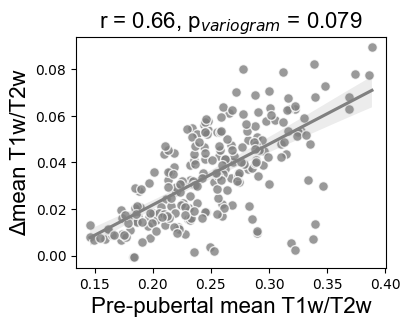

In [ ]:
# ----- Load data ----- #

# Mean T1w/T2w per subject (filtered dataset from 1.2)
mean_t12_per_subj_df_filt = pd.read_csv('output/subj_dfs/mean_t12_per_subj_filt.csv', index_col=0)

# Average mean T1w/T2w per ROI in pre-pubertal animals (< 1 year)
mean_t12_pre_puberty = mean_t12_per_subj_df_filt.loc[
    mean_t12_per_subj_df_filt['Age'] < 1, mean_t12_per_subj_df_filt.columns[4:]
].mean(axis=0).values

# Multiple linear regression results (from 4.2)
mlr_results_df = pd.read_csv('output/mlr/mean_t12_mlr.csv', index_col=0)

# ----- Correlate ----- #

# Lookup table and distance matrix
lut = pd.read_csv('data/lut_master.csv', index_col=0)
dist = pd.read_csv('data/distance_matrix.csv', index_col=0)

# Spatially constrained correlation (Brainsmash)
r, p = get_brainsmashed_region_correlation_p_val(
    map_a=mean_t12_pre_puberty,
    map_b=mlr_results_df['b_Age'].values,
    regions_ind=None,
    dist=dist.values,
    surrogates_filename='output/surrogates/mean_t12_pre_puberty_surrogates_lh.csv',
    lh=False,
    n_perm=1000,
    test_type='two-tailed'
)

# ----- Plot ----- #
df = pd.DataFrame({
    'pre_pubertal': mean_t12_pre_puberty,
    'd_mean_t12': mlr_results_df['b_Age'].values
})

plt.figure(figsize=(4, 3))
sns.regplot(
    x='pre_pubertal', y='d_mean_t12', data=df,
    color='grey', marker='o',
    line_kws={'color': 'grey'},
    scatter_kws={'s': 50, 'edgecolors': 'white'}
)

plt.xlabel('Pre-pubertal mean T1w/T2w', fontsize=16, fontfamily='Arial')
plt.ylabel('Δmean T1w/T2w', fontsize=16, fontfamily='Arial')

p_text = '< 0.001' if p < 0.001 else f'= {p:.3f}'
plt.title(f'r = {r:.2f}, p$_{{variogram}}$ {p_text}', fontsize=16, fontfamily='Arial')
plt.show()


Now run mean T1w/T2w models with the addition of normalisation covariates (median vitreous humour and median white matter, which are are provided). Cross correlate b_Age vectors resulting from these models to assess correspondence.

100%|██████████| 230/230 [00:00<00:00, 1006.95it/s]


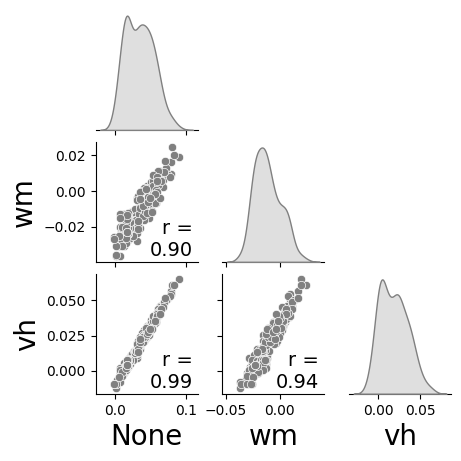

In [ ]:
# ----- Load data ----- #

# Mean T1w/T2w per subject (filtered dataset from 1.2), restrict to developmental subset (< 3 years)
mean_t12_per_subj_df_filt = pd.read_csv('output/subj_dfs/mean_t12_per_subj_filt.csv', index_col=0)
mean_t12_dev = mean_t12_per_subj_df_filt[mean_t12_per_subj_df_filt['Age'] < 3]

# Covariates per subject (filtered dataset from 1.2), restrict to developmental subset
covariate_per_subj_df_filt = pd.read_csv('output/subj_dfs/covariate_per_subj_filt.csv', index_col=0)
covariate_dev = covariate_per_subj_df_filt[covariate_per_subj_df_filt['Age'] < 3]
covariate_dev = covariate_dev.reindex(mean_t12_dev.index)

# Merge covariates and T1w/T2w data
df = covariate_dev.merge(mean_t12_dev, how="inner")


# ----- Run models ----- #

# Covariates to test in regression
covariate_results_dict = {
    'None': [],
    'wm': [],
    'vh': []
}

# ROI columns
rois = mean_t12_dev.columns[4:]

# Loop covariates, run regression, store Age coefficients
for covariate in list(covariate_results_dict.keys()):
    if covariate != 'None':
        predictors = ['Age', 'Sex', covariate]
    else:
        predictors = ['Age', 'Sex']

    mlr_results_df = run_mlr(df, rois, predictors)
    covariate_results_dict[covariate] = mlr_results_df['b_Age']


# ----- Plot ----- #

b_age_df = pd.DataFrame(covariate_results_dict)

# Pairplot of Age betas across models (KDE on diagonal, scatter off-diagonal)
g = sns.pairplot(
    b_age_df, diag_kind="kde", corner=True, height=1.5,
    plot_kws={'color': 'grey'},
    diag_kws={'color': 'grey', 'fill': True}
)

# Annotate Spearman r on upper triangle plots
num_vars = len(b_age_df.columns)
for i in range(num_vars):
    for j in range(i + 1, num_vars):
        r, _ = spearmanr(b_age_df.iloc[:, i], b_age_df.iloc[:, j])
        ax = g.axes[j, i]
        ax.text(0.95, 0.05, f"r =\n{r:.2f}", transform=ax.transAxes,
                ha='right', fontsize=14)

# Tidy axis labels
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=20)
        ax.set_ylabel(ax.get_ylabel(), fontsize=20)

plt.show()

#### **Supplementary Figure 10: Adult maturational plateau is robust to bin size**

Supplementary analyses for Main Figure 5.

Here, the age-binned mean network correlations in Figure 5A are reproduced using alternative bin sizes of 6 months and 3 months

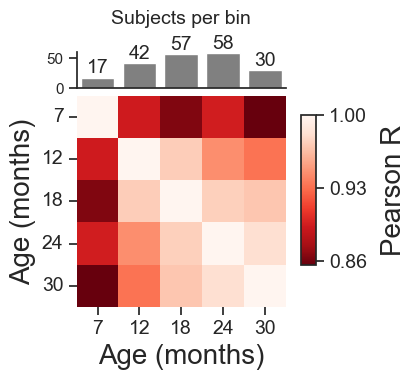

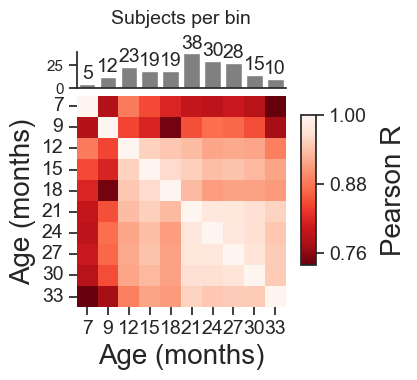

In [7]:
# Load dataage_bin_correlations
edge_per_subj_df_filt = pd.read_csv('output/subj_dfs/edge_per_subj_filt.csv', index_col=0)

# Define age bin limits (6-month age bins starting at 6 months)
age_bins = np.arange(6/12,3.25,6/12)

# Use plotting helper function
age_bin_correlations(edge_per_subj_df_filt, age_bins, cbar_min=0.86)

# Load data age bin limits (3-month age bins starting at 6 months)
edge_per_subj_df_filt = pd.read_csv('output/subj_dfs/edge_per_subj_filt.csv', index_col=0)

# Define age bin limits (3-month age bins starting at 6 months)
age_bins = np.arange(6/12,3.25,3/12)

# Use plotting helper function
age_bin_correlations(edge_per_subj_df_filt, age_bins, cbar_min=0.76)

#### **Supplementary Figure 11:  Auditory regions become microstructurally differentiated from the rest of the cortex**

Supplementary analyses for Main Figure 6.

Use multiple linear regressions to estimate linear change in degree in each ROI 

In [8]:
# Degree per subject (filtered dataset from 1.2)
degee_per_subj_df_filt = pd.read_csv('output/subj_dfs/degree_per_subj_filt.csv', index_col=0)

# Developmental subset (< 3 years)
degree_dev = degee_per_subj_df_filt[degee_per_subj_df_filt['Age'] < 3]

# Run multiple linear regressions
mlr_results_df = run_mlr(degree_dev, rois, ['Age', 'Sex'])

100%|██████████| 230/230 [00:00<00:00, 1227.73it/s]


Plot B_age values per cortical zone

/Users/EdHutchings_1/proj1/analyses/code/plotting_helpers.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


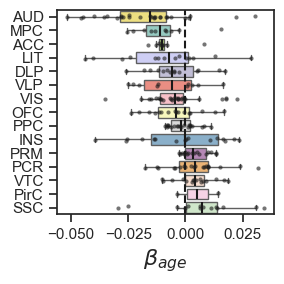

In [9]:
lut = pd.read_csv('data/lut_master.csv', index_col=0)

df = pd.DataFrame({'vals':mlr_results_df['b_Age'], 'groups':lut['zone']})

# Run boxplot code
cortical_zone_boxplot(df, x_lab=r'$\beta_{age}$', h_line=True)

Re-run regression with eTIV as a covariate and assess correspondence between b_Age values in original model and eTIV model

/var/folders/_0/khf_d2y950q8x7b5c90znmhw0000gn/T/ipykernel_98664/2736768405.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degree_dev.loc[:, 'etiv'] = covariate_dev['etiv']
100%|██████████| 230/230 [00:00<00:00, 1036.39it/s]


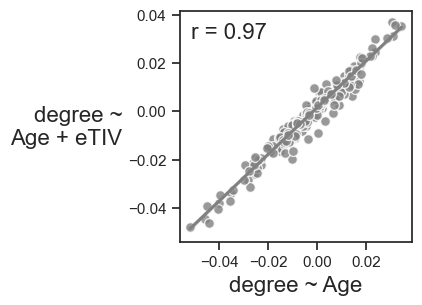

In [10]:
# ----- Load covariates ----- #

# Covariates per subject (filtered dataset from 1.2), restrict to developmental subset (< 3 years)
covariate_per_subj_df_filt = pd.read_csv('output/subj_dfs/covariate_per_subj_filt.csv', index_col=0)
covariate_dev = covariate_per_subj_df_filt[covariate_per_subj_df_filt['Age'] < 3]
covariate_dev = covariate_dev.reindex(degree_dev.index)

# Add eTIV to degree dataframe
degree_dev.loc[:, 'etiv'] = covariate_dev['etiv']


# ----- Run models ----- #

# MLR with eTIV
mlr_with_etiv_results_df = run_mlr(degree_dev, rois, ['Age', 'Sex', 'etiv'])

# Correlate Age coefficients across models
b_age_df = pd.DataFrame({
    'Age': mlr_results_df['b_Age'],
    'Age, eTIV': mlr_with_etiv_results_df['b_Age']
})

r, _ = spearmanr(b_age_df['Age'], b_age_df['Age, eTIV'])


# ----- Plot ----- #

plt.figure(figsize=(3, 3))
sns.regplot(
    x='Age', y='Age, eTIV', data=b_age_df,
    color='grey', marker='o',
    line_kws={'color': 'grey'},
    scatter_kws={'s': 50, 'edgecolors': 'white'}
)

plt.xlabel('degree ~ Age', fontsize=16, fontfamily='Arial')
plt.ylabel('degree ~\nAge + eTIV', fontsize=16, fontfamily='Arial', rotation=0, ha='right', va='center')

# Annotate correlation in top-left
ax = plt.gca()
x1, x2 = ax.get_xlim(); y1, y2 = ax.get_ylim()
ax.text(
    x1 + 0.05*(x2-x1), y1 + 0.95*(y2-y1),
    f'r = {r:.2f}', ha="left", va="top",
    fontsize=16, fontfamily='Arial'
)

plt.show()

#### **Supplementary Figure 12: Maturational clustering sensitivity analyses**

Supplementary analyses for Main Figure 6.
    
First, assess overlap between T1w/T2w maturational clusters and cortical zones

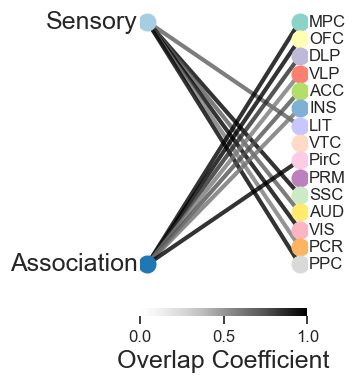

In [11]:
# ----- Load data ----- #

# Load edge MLR results
mlr_results_df = pd.read_csv('output/mlr/edge_mlr_results.csv', index_col=0)

# Re-format to matrix
n_rois = 230
b_age_mat = np.zeros((n_rois,n_rois))
b_age_mat[np.triu_indices(n_rois, k=1)] = mlr_results_df['b_Age']
b_age_mat = pd.DataFrame(b_age_mat + b_age_mat.T)


# ----- Plot overlap ----- #

# Compute clusters
cluster_labels = hierarchical_clustering(b_age_mat.values, n_clusters=2)

# Load lookup table
lut = pd.read_csv('data/lut_master.csv', index_col=0)

# Initialise dataframe to hold plotting data
df = pd.DataFrame({'region':lut['ROI'][0:115], 
                   'zone':lut['zone'][0:115], 
                   'cluster':cluster_labels[0:115]})

# Colour map for clusters (T1w/T2w)
cluster_cmap = {
    0: [0.6510, 0.8078, 0.8902],
    1: [0.1216, 0.4706, 0.7059],
    2: [0.6980, 0.8745, 0.5412],
    3: [0.2000, 0.6275, 0.1725],
}

# Call plotting function
cluster_zone_overlap(df, cluster_cmap, cluster_strings=['Sensory', 'Association'], overlap_threshold=0.5)

Plot clustered matrix and dendrogram for 3 and 4 cluster solutions

/Users/EdHutchings_1/proj1/analyses/marm_MIND/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/EdHutchings_1/proj1/analyses/marm_MIND/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


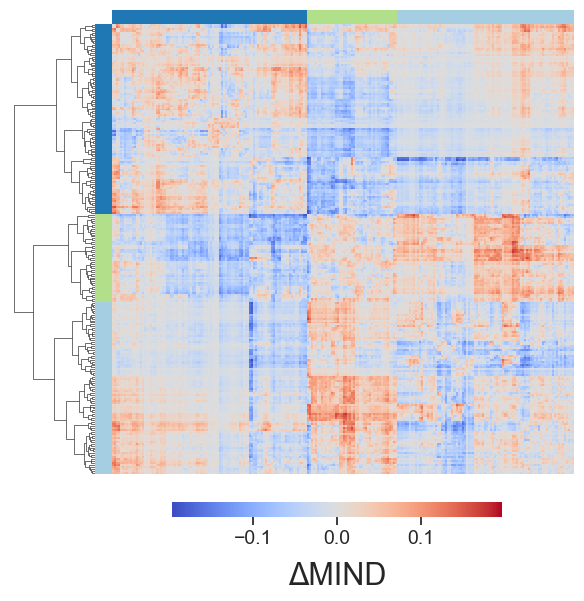

/Users/EdHutchings_1/proj1/analyses/marm_MIND/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/EdHutchings_1/proj1/analyses/marm_MIND/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


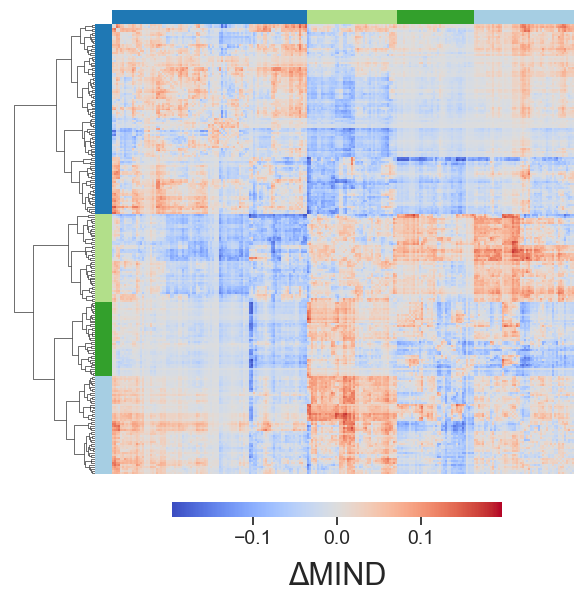

In [12]:
# Define colour map
cluster_cmap = {
    0: [0.6510, 0.8078, 0.8902],
    1: [0.1216, 0.4706, 0.7059],
    2: [0.6980, 0.8745, 0.5412],
    3: [0.2000, 0.6275, 0.1725]
}

# Call plotting function with 3 clusters
plot_dendrogram_and_matrix(X = b_age_mat.values, 
                           n_clusters=3,
                           cluster_cmap=cluster_cmap, 
                           cbar_label='ΔMIND')

# Define colour map (manually re-ordered due to random re-assignment of cluster identities)
cluster_cmap = {
    0: [0.1216, 0.4706, 0.7059],
    1: [0.6510, 0.8078, 0.8902],
    2: [0.6980, 0.8745, 0.5412],
    3: [0.2000, 0.6275, 0.1725]
}

# Call plotting function with 4 clusters
plot_dendrogram_and_matrix(X = b_age_mat.values, 
                           n_clusters=4,
                           cluster_cmap=cluster_cmap, 
                           cbar_label='ΔMIND')

#### **Supplementary Figure 13: Maturational changes in MBP expression similarity are concordant with changes in T1w/T2w ratio similarity**

Supplementary analyses for Main Figure 6.
    
Begin by computing edge-level changes in MBP expression MIND between the 6-month and 4-year animal, then visualise

/Users/EdHutchings_1/proj1/analyses/code/plotting_helpers.py:103: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(mpatches.Rectangle((-3, i), 3, 1, color=row_colors[i], clip_on=False, lw=1, edgecolor='face'))  # Left
/Users/EdHutchings_1/proj1/analyses/code/plotting_helpers.py:104: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(mpatches.Rectangle((i, -3), 1, 3, color=col_colors[i], clip_on=False, lw=1, edgecolor='face'))  # Top


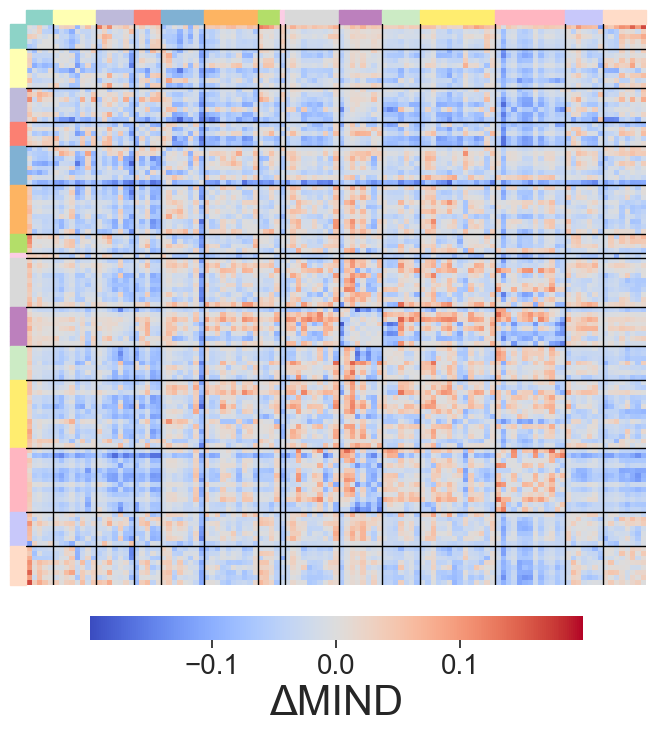

In [ ]:
# MBP 6-month MIND path
MBP_6mo_MIND_path = 'output/MBP/MBP_6mo_MIND.csv'

# Load or compute 6-month MIND
if os.path.exists(MBP_6mo_MIND_path):
    MBP_6mo_MIND = pd.read_csv(MBP_6mo_MIND_path, index_col=0)
else:
    # Load lookup table
    lut = pd.read_csv('data/lut_master.csv', index_col=0)

    # Load voxels from MBP 6-month image
    MBP_6mo_vox = pd.read_csv('output/MBP/MBP_6mo_vox.csv', index_col=0)
    
    # Compute MIND
    labs = lut['Label'].unique()
    MBP_6mo_MIND = calculate_mind_network(MBP_6mo_vox, ['Value'], labs)

    # Save
    MBP_6mo_MIND.to_csv('output/MBP/MBP_6mo_MIND.csv')

# Load 4-year MBP MIND
MBP_4Y_MIND = pd.read_csv('output/MBP/MBP_4Y_MIND.csv', index_col=0)

# Compute rate of change in MBP MIND
d_MBP_MIND = (MBP_4Y_MIND - MBP_6mo_MIND) / 3.5

# Visualise edge-wise changes
matrix_plot(d_MBP_MIND, 
            edge_cmap='coolwarm', diverging=True, 
            cbar_label='ΔMIND', 
            patches=True, boundaries=True, labels=False,
            save_path=None)

Now, perform identical clustering analysis to Figure 6. Begin by visualising the d_MBP_MIND matrix clustered using N=2 clusters and the associated dendrogram 

/Users/EdHutchings_1/proj1/analyses/marm_MIND/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/EdHutchings_1/proj1/analyses/marm_MIND/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


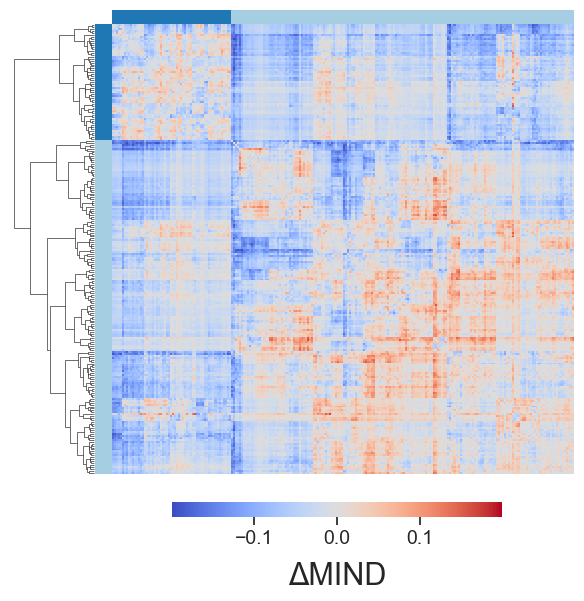

In [ ]:
# Generate colour mapping for clusters
cluster_cmap = {
    0: [0.6510, 0.8078, 0.8902], # Association
    1: [0.1216, 0.4706, 0.7059], # Sensory
    2: [0.6980, 0.8745, 0.5412],
    3: [0.2000, 0.6275, 0.1725],
}

# Call plotting function
plot_dendrogram_and_matrix(X = d_MBP_MIND.values, 
                           n_clusters=2,
                           cluster_cmap=cluster_cmap, 
                           cbar_label='ΔMIND',
                           save_path=None)

Quantitatively compare clustering solutions for T1w/T2w and MBP expression MIND development matrices by correlating their cophenetic distance matrices.

In [15]:
# Load T1w/T2w MIND developmental results
mlr_results_df = pd.read_csv('output/mlr/edge_mlr_results.csv', index_col=0)

# Re-format into matrix
n_rois = 230
b_age_mat = np.zeros((n_rois, n_rois))
b_age_mat[np.triu_indices(n_rois, k=1)] = mlr_results_df['b_Age']
b_age_mat = pd.DataFrame(b_age_mat + b_age_mat.T)

# Extract cophenetic distance matrix upper triangles and correlate
coph_r, _= spearmanr(get_coph_dist_mat(b_age_mat), get_coph_dist_mat(d_MBP_MIND))

# Print correlation
print(f'Cophenetic distance correlation = {coph_r:.2f}')

Cophenetic distance correlation = 0.22


Assess overlap between MBP development clusters and cortical zones

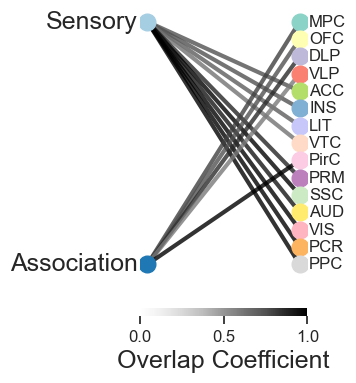

In [ ]:
# Compute clusters
cluster_labels = hierarchical_clustering(d_MBP_MIND.values, n_clusters=2)

# Load lookup table
lut = pd.read_csv('data/lut_master.csv', index_col=0)

# Initialise dataframe to hold plotting data
df = pd.DataFrame({'region':lut['ROI'][0:115], 
                   'zone':lut['zone'][0:115], 
                   'cluster':cluster_labels[0:115]})

# Colour map for clusters (T1w/T2w)
cluster_cmap = {
    0: [0.6510, 0.8078, 0.8902],
    1: [0.1216, 0.4706, 0.7059],
    2: [0.6980, 0.8745, 0.5412],
    3: [0.2000, 0.6275, 0.1725],
}

# Call plotting function
cluster_zone_overlap(df, cluster_cmap, cluster_strings=['Sensory', 'Association'], overlap_threshold=0.5, save_path=None)

Compare 1) the mean degree of lamination and 2) the mean hierarchical level of sensory and association clusters using an unpaired t-test. 

In [17]:
# Compute clusters
cluster_labels = hierarchical_clustering(d_MBP_MIND.values, n_clusters=2)

# Load lookup table
lut = pd.read_csv('data/lut_master.csv', index_col=0)

# Dictionary defining mapping from cortical type to degree of lamination
type_to_lamination_mapping = {
    'Agranular': 1,
    'Dysgranular': 2,
    'Eulaminate I': 3,
    'Eulaminate II': 4,
    'Eulaminate III': 5,
    'Koniocortex': 6
}

# Map type to number (degree of lamination)
lut['lamination'] = lut['type'].map(type_to_lamination_mapping)

# Create dataframe for plotting (left hemisphere)
plotting_df = pd.DataFrame({'ROI':lut['Label'][0:115],
                            'lvl':lut['lvl'][0:115], 
                            'lamination':lut['lamination'][0:115],
                            'cluster':cluster_labels[0:115]})
#plotting_df = plotting_df.dropna()

# Dictionary defining mapping from cluster number to cluster name
cluster_num_to_name_mapping = {
        0: 'Sensory',
        1: 'Association',
    }

# Map cluster number to name
plotting_df['cluster_name'] = plotting_df['cluster'].map(cluster_num_to_name_mapping)

# Print number of regions in each cluster (left hemisphere)
print(f"Number of left hemisphere regions in sensory cluster = {plotting_df[plotting_df['cluster'] == 0].shape[0]}")
print(f"Number of left hemisphere regions in association cluster = {plotting_df[plotting_df['cluster'] == 1].shape[0]}")

Number of left hemisphere regions in sensory cluster = 85
Number of left hemisphere regions in association cluster = 30


100%|██████████| 1000/1000 [00:04<00:00, 202.90it/s]
/Users/EdHutchings_1/proj1/analyses/marm_MIND/lib/python3.11/site-packages/statannotations/Annotator.py:825: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "
/Users/EdHutchings_1/proj1/analyses/code/plotting_helpers.py:529: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Assoc', 'Sensory'], fontsize=12, fontfamily='Arial')


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Association vs. Sensory: *


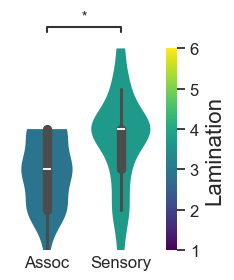

t = 3.990, p = 0.045


In [ ]:
# Distance matrix
dist = pd.read_csv('data/distance_matrix.csv', index_col=0)
dist = dist.iloc[0:115,0:115].values

# Mean adult T1w/T2w
adult_mean_t12 = pd.read_csv('output/T1wT2w/mean/mean_adult_regional_t12.csv', index_col=0)
adult_mean_t12 = adult_mean_t12[adult_mean_t12.columns[0]].values[0:115]

plot_2_cluster_lamination(df=plotting_df, 
                          map=adult_mean_t12, 
                          dist=dist, 
                          surrogates_filename='output/surrogates/mean_adult_t12_surrogates.csv', 
                          n_perm=1000, 
                          test_type='two-tailed',
                          save_path=None)

100%|██████████| 1000/1000 [00:04<00:00, 203.72it/s]
/Users/EdHutchings_1/proj1/analyses/marm_MIND/lib/python3.11/site-packages/statannotations/Annotator.py:825: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "
/Users/EdHutchings_1/proj1/analyses/code/plotting_helpers.py:645: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Assoc', 'Sensory'], fontsize=12, fontfamily='Arial')


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Association vs. Sensory: **


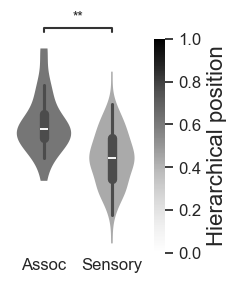

t = -5.262, p = 0.007


In [ ]:
# Distance matrix
dist = pd.read_csv('data/distance_matrix.csv', index_col=0)
dist = dist.iloc[0:115,0:115].values

# Mean adult T1w/T2w
adult_mean_t12 = pd.read_csv('output/T1wT2w/mean/mean_adult_regional_t12.csv', index_col=0)
adult_mean_t12 = adult_mean_t12[adult_mean_t12.columns[0]].values[0:115]

plot_2_cluster_SA_position(df=plotting_df, 
                           map=adult_mean_t12, 
                           dist=dist, 
                           surrogates_filename='output/surrogates/mean_adult_t12_surrogates.csv', 
                           n_perm=1000, 
                           test_type='two-tailed',
                           save_path=None)